In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

(100,)


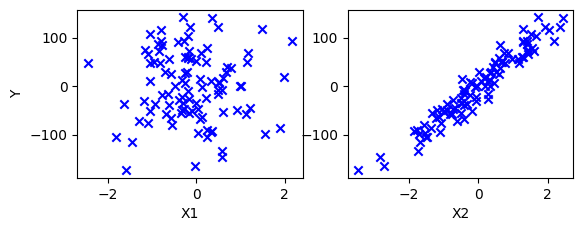

In [10]:
size = 100
X, y = make_regression(n_samples=size, n_features=2, n_targets=1, noise=20, random_state=15)
m = len(X[:,0])
X = np.concatenate((X,np.ones((m,1))),axis=1)
n = len(X[0,:])
X1 = X[:,0]
X2 = X[:,1]
print(y.shape)
plt.subplot(2,2,1)
plt.scatter(X1, y, color="blue", marker="x")
plt.xlabel("X1")
plt.ylabel("Y")

plt.subplot(2,2,2)
plt.scatter(X2, y, color="blue", marker="x")
plt.xlabel("X2")

plt.show()

In [11]:
class batchGDRegressor:
    def __init__(self, epochs, learning_rate, batch_size):
        self.epochs = epochs
        self.lr = learning_rate
        self.batch_size = batch_size
    
    def fit(self, X, y):
        self.m = X.shape[0]
        self.n = X.shape[1]
        self.b = np.ones(n)
        self.b[n-1]=0
        self.b_x = np.ones((self.epochs,n))
        self.loss = np.zeros((self.epochs,n))

        for i in range(self.epochs):
            for c in range(self.n):
                y_hat = np.dot(X, self.b)
                db = (-2/self.m)*np.sum((y - y_hat)*X[:,c])

                self.b_x[[i,c]] = self.b[c]
                self.loss[[i,c]] = (1/self.m)*np.sum((y - np.dot(X, self.b))**2)

                self.b[c] = self.b[c] - self.lr*db

        return self.b, self.loss

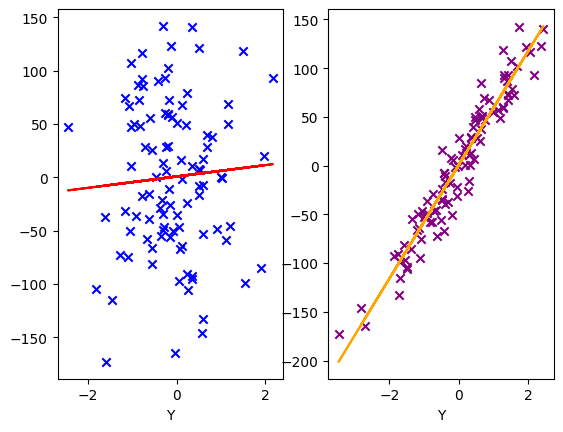

In [12]:
bGD = batchGDRegressor(1000, 0.01, 10)
b, loss = bGD.fit(X, y)

plt.subplot(1,2,1)
plt.scatter(X[:,0], y, color="blue", marker="x")
plt.plot(X[:,0], b[0]*X[:,0]+b[2], color="red")
plt.xlabel("X1")
plt.xlabel("Y")

plt.subplot(1,2,2)
plt.scatter(X[:,1], y, color="purple", marker="x")
plt.plot(X[:,1], b[1]*X[:,1]+b[2], color="orange")
plt.xlabel("X2")
plt.xlabel("Y")
plt.show()

M= [ 5.31494387 58.34735372  0.        ]  B= 0.8518920818778831


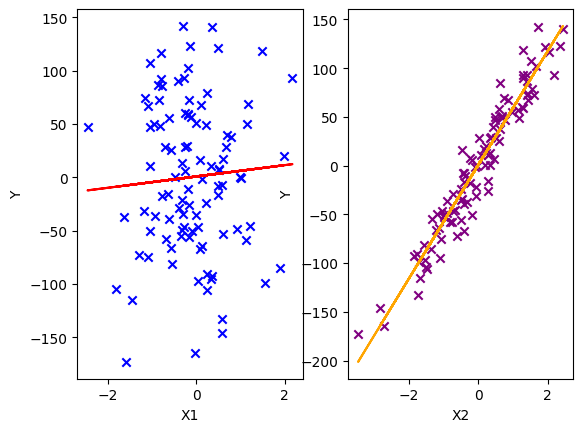

In [13]:
# verifying with the linear regression definition from sklearn library
lRegression = LinearRegression()
lRegression.fit(X, y)
M = lRegression.coef_
B = lRegression.intercept_

print("M=", M, " B=", B)

plt.subplot(1,2,1)
plt.scatter(X1, y, color="blue", marker="x")
plt.plot(X1, X1*M[0]+B, color="red")
plt.xlabel("X1")
plt.ylabel("Y")

plt.subplot(1,2,2)
plt.scatter(X2, y, color="purple", marker="x")
plt.plot(X2, X2*M[1]+B, color="orange")
plt.xlabel("X2")
plt.ylabel("Y")
plt.show()